In [4]:
import pandas as pd
import numpy as np

In [ ]:
# Load Dataset
df = pd.read_csv('single_genre_artists.csv')  # Make sure file is in working dir
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [ ]:
# Feature Selection
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'duration_ms']
df_features = df[features]
df_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


In [ ]:
#  Data Preprocessing: Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [ ]:
# Clustering using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=3000)
kmeans.fit(df_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,3000
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Attach cluster labels to data
df['Cluster'] = kmeans.labels_


In [ ]:
# Cluster Distribution
df['Cluster'].value_counts()

Cluster
0    30373
3    24584
4    21080
2    12273
1     7527
Name: count, dtype: int64

In [ ]:
#  Add human-understandable cluster names
cluster_names = {
    0: 'Instrumental / Acoustic',
    1: 'Mainstream / Party',
    2: 'Happy / Dance',
    3: 'Vocal / Speech-heavy',
    4: 'Chill / Relaxing'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_names)

In [ ]:
#  Check distribution with cluster labels
df['Cluster_Label'].value_counts()

Cluster_Label
Instrumental / Acoustic    30373
Vocal / Speech-heavy       24584
Chill / Relaxing           21080
Happy / Dance              12273
Mainstream / Party          7527
Name: count, dtype: int64

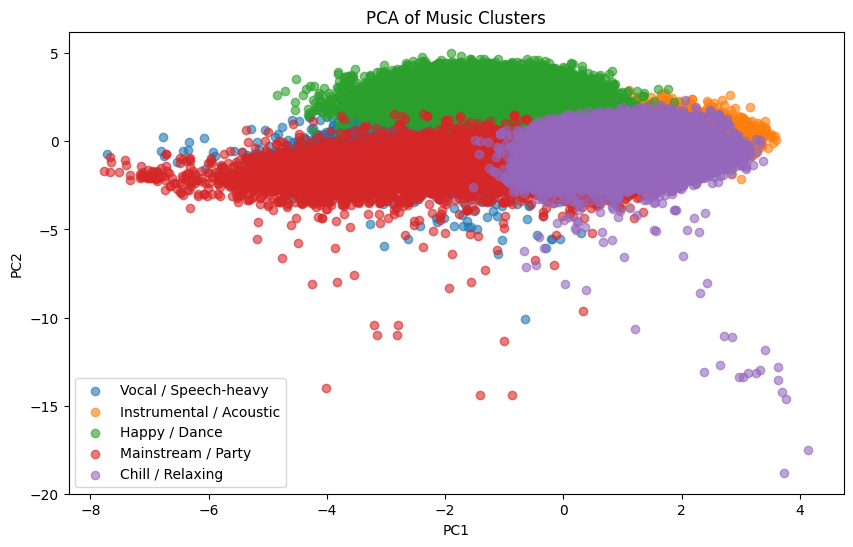

In [ ]:
# Visualization: PCA plot for cluster separation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,6))
for cluster in df['Cluster'].unique():
    plt.scatter(reduced_features[df['Cluster']==cluster, 0],
                reduced_features[df['Cluster']==cluster, 1],
                label=cluster_names[cluster], alpha=0.6)
plt.legend()
plt.title('PCA of Music Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#  Silhouette Score to evaluate clustering
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.186
